In [237]:
import pandas as pd
import matplotlib.pyplot as plt

In [238]:
abDf = pd.read_csv("./olympic/Olympic_Athlete_Bio.csv")
abDf.head()

,athlete_id,name,sex,born,height,weight,country,country_noc,description,special_notes
0,65649,Ivanka Bonova,Female,4 April 1949,166.0,55,Bulgaria,BUL,Personal Best: 400 – 53.54 (1980).,NaN
1,112510,Nataliya Uryadova,Female,15 March 1977,184.0,70,Russian Federation,RUS,NaN,Listed in Olympians Who Won a Medal at the Eur...
2,114973,Essa Ismail Rashed,Male,14 December 1986,165.0,55,Qatar,QAT,Personal Best: 10000 – 27:20.97 (2006).,Listed in Olympians Who Won a Medal at the Asi...
3,30359,Péter Boros,Male,12 January 1908,NaN,NaN,Hungary,HUN,"Between 1927 and 1938, Péter Boros competed as...",NaN
4,50557,Rudolf Piowatý,Male,28 April 1900,NaN,NaN,Czechoslovakia,TCH,Rudolf Piowaty joined the Czechoslovak militar...,NaN


In [239]:
abDf = abDf.drop(columns=['description','special_notes'])
abDf.columns

Index(['athlete_id', 'name', 'sex', 'born', 'height', 'weight', 'country',
       'country_noc'],
      dtype='object')

In [240]:
list_abDf = ['athlete_id','height','weight']
abDf[list_abDf] = abDf[list_abDf].apply(pd.to_numeric, errors='coerce')
abDf.fillna(abDf.select_dtypes(include=['number']).mean().round(1), inplace=True)
abDf.dropna(inplace=True)

# ATHLETE BIO

[np.int64(111689), np.int64(40119)]


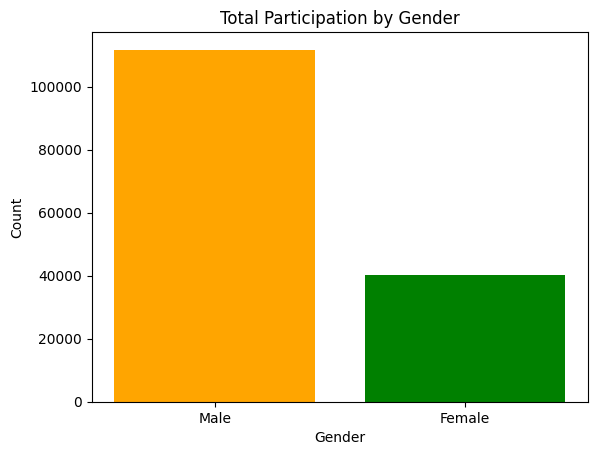

In [241]:
# Assuming abDf is your DataFrame
gender_bar = [abDf[abDf['sex'] == 'Male']['sex'].count(), abDf[abDf['sex'] == 'Female']['sex'].count()]
print(gender_bar)

# Define the labels for the x-axis
labels = ['Male', 'Female']

# Create the bar chart
plt.title("Total Participation by Gender")
plt.bar(labels, gender_bar,color=['orange','green'])  # Pass labels and heights
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


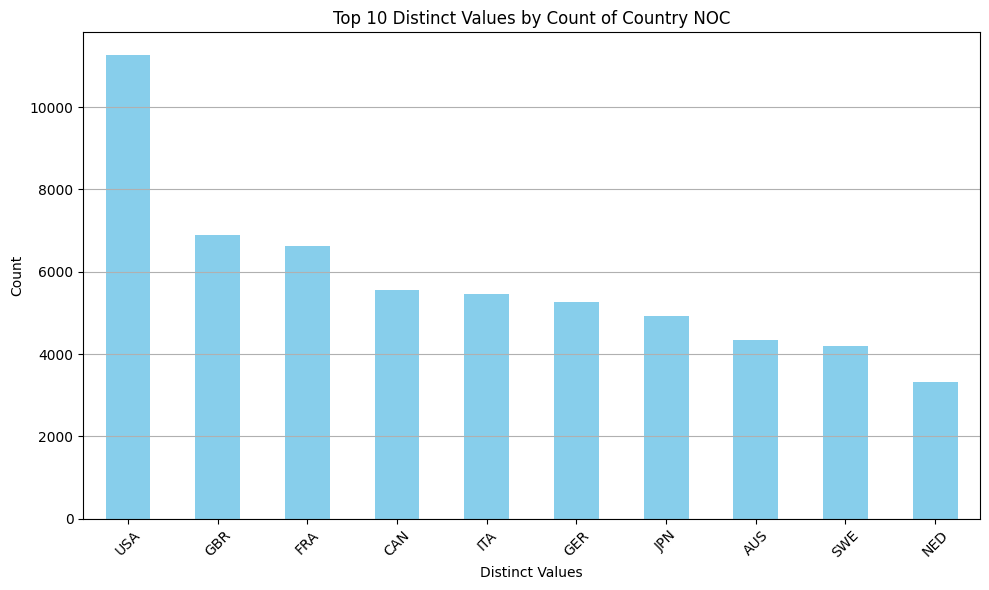

In [242]:
value_counts = abDf['country_noc'].value_counts()
top_10 = value_counts.head(10)
plt.figure(figsize=(10, 6))
top_10.plot(kind='bar', color='skyblue')
plt.title('Top 10 Distinct Values by Count of Country NOC')
plt.xlabel('Distinct Values')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


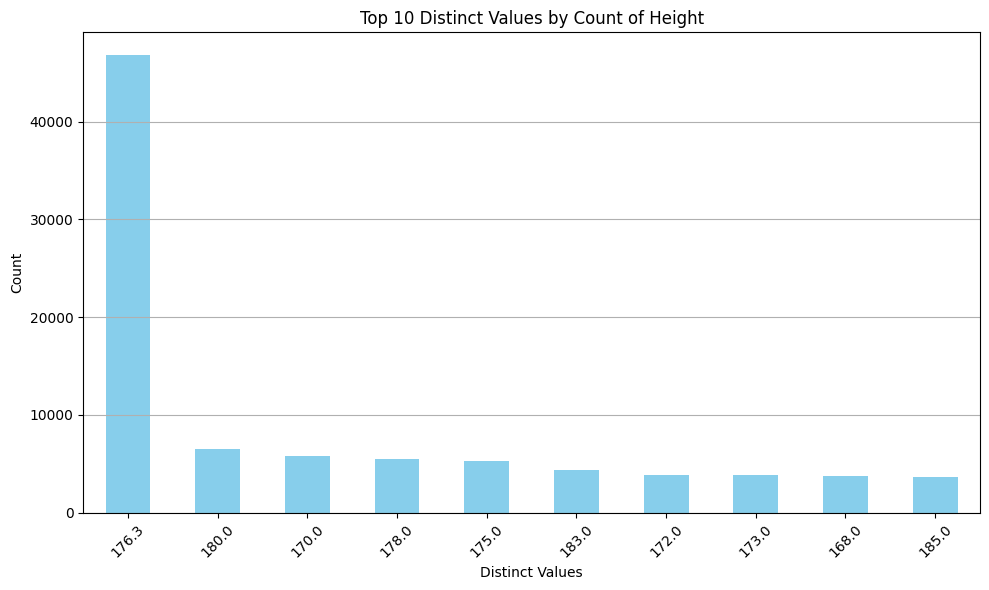

In [243]:
value_counts = abDf['height'].value_counts()
top_10 = value_counts.head(10)
plt.figure(figsize=(10, 6))
top_10.plot(kind='bar', color='skyblue')
plt.title('Top 10 Distinct Values by Count of Height')
plt.xlabel('Distinct Values')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


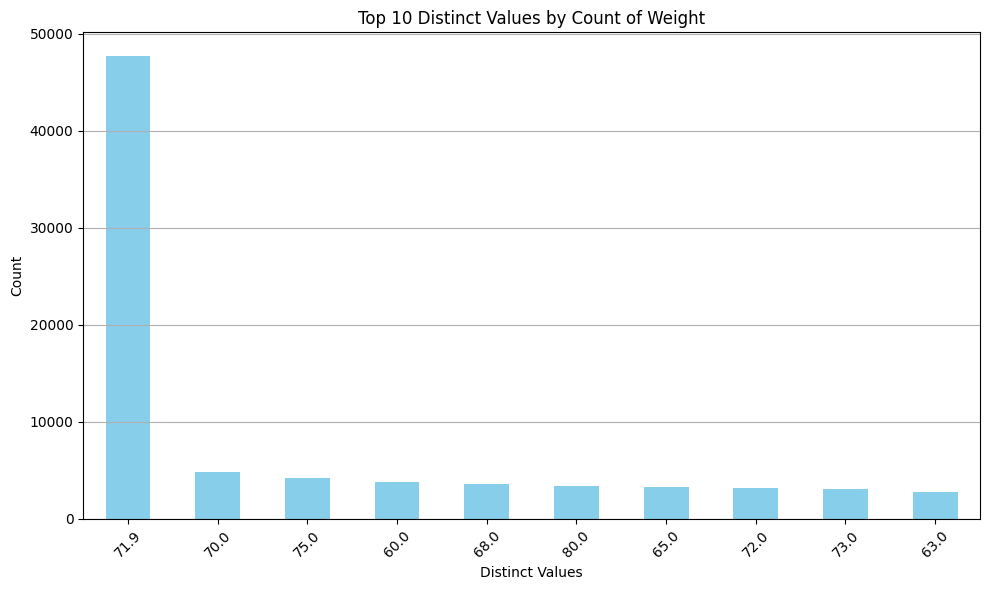

In [244]:
value_counts = abDf['weight'].value_counts()
top_10 = value_counts.head(10)
plt.figure(figsize=(10, 6))
top_10.plot(kind='bar', color='skyblue')
plt.title('Top 10 Distinct Values by Count of Weight')
plt.xlabel('Distinct Values')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


# Game Medal

In [245]:
gmDf = pd.read_csv("./olympic/Olympic_Games_Medal_Tally.csv")
gmDf.head()

,edition,edition_id,year,country,country_noc,gold,silver,bronze,total
0,1896 Summer Olympics,1,1896,United States,USA,11,7,2,20
1,1896 Summer Olympics,1,1896,Greece,GRE,10,18,19,47
2,1896 Summer Olympics,1,1896,Germany,GER,6,5,2,13
3,1896 Summer Olympics,1,1896,France,FRA,5,4,2,11
4,1896 Summer Olympics,1,1896,Great Britain,GBR,2,3,2,7


<Figure size 1000x600 with 0 Axes>

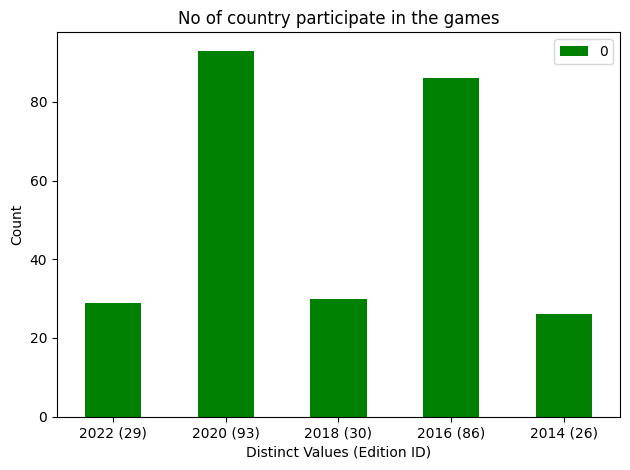

In [246]:
# Assuming gmDf is your DataFrame and it's already defined
unique_sorted = sorted(gmDf['edition_id'].unique(), reverse=True)
data = pd.DataFrame()

for i in unique_sorted[:5]:
    value_counts = gmDf[gmDf['edition_id'] == i]['edition_id'].value_counts()
    data[f'{gmDf[gmDf['edition_id'] == i ]['year'].unique()[0]} ({value_counts.values[0]})'] = value_counts.values 

data = data.T
data = data.fillna(0)

plt.figure(figsize=(10, 6))
data.plot(kind='bar', color='green')
plt.title('No of country participate in the games')
plt.xlabel('Distinct Values (Edition ID)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show() 


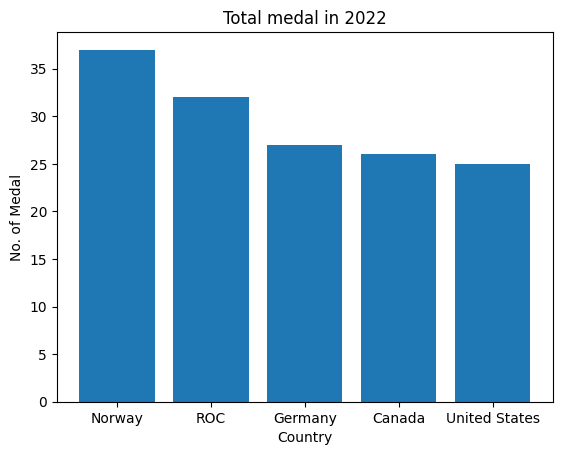

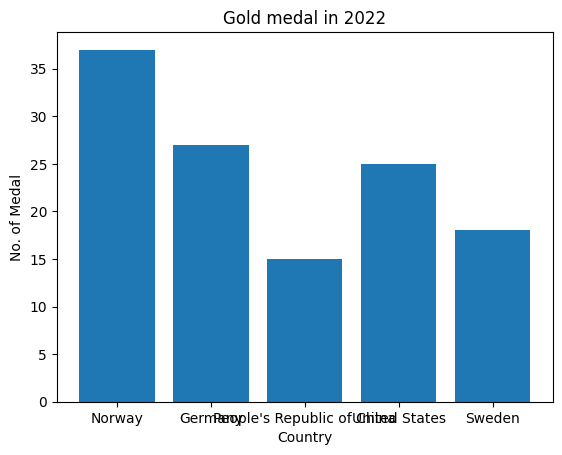

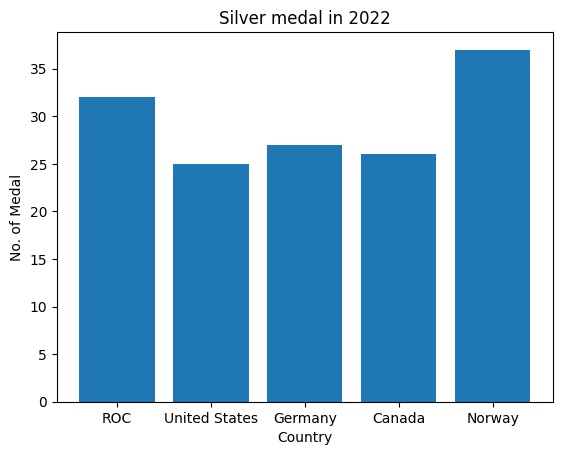

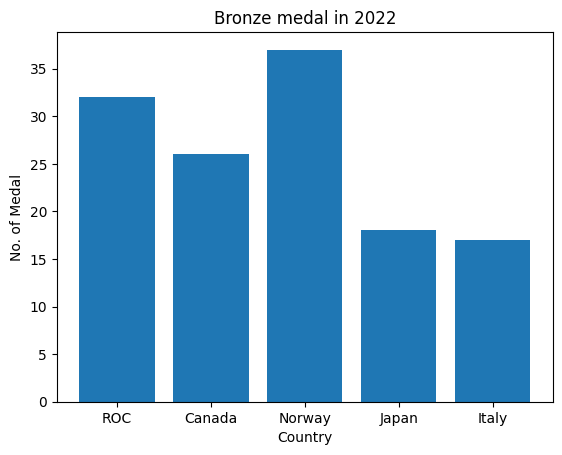

In [247]:
"""Total Medal win by the top 5 country"""

medal = gmDf[gmDf.year == 2022]
total = medal.sort_values(by='total',ascending=False)
gold = medal.sort_values(by='gold',ascending=False)
silver = medal.sort_values(by='silver',ascending=False)
bronze = medal.sort_values(by='bronze',ascending=False)

for i in [(total,"Total"),(gold,"Gold"),(silver,"Silver"),(bronze,"Bronze")]:
    x = i[0].head(5)['country'].tolist()
    y = i[0].head(5)['total'].tolist()
    plt.title(f"{i[1]} medal in 2022")
    plt.bar(x,y)
    plt.xlabel("Country")
    plt.ylabel("No. of Medal")
    plt.show()

# Results

In [248]:
rDf = pd.read_csv("./olympic/Olympic_Results.csv")
rDf.head()

,result_id,event_title,edition,edition_id,sport,sport_url,result_date,result_location,result_participants,result_format,result_detail,result_description
0,30359,"Super-Heavyweight (>105 kilograms), Men",2004 Summer Olympics,26,Weightlifting,/editions/26/sports/WLF,"25 August 2004 — 16:30 (B), 20:00 (A)","Olympiako Gymnastirio Arsis Varon Nikaias, Nikaia",17 from 15 countries,Total of best lifts in snatch and clean & jerk...,na,"Not so much a competition as a coronation, the..."
1,1626,"Giant Slalom, Women1",1998 Winter Olympics,46,Snowboarding,/editions/46/sports/SBD,9 February 1998,"Mt. Yakebitai, Shiga Kogen, Yamanouchi",31 from 14 countries,"Two runs, total time determined placement.",Gates: 38 / 36Length: 936 mStart Altitude: 196...,The women’s giant slalom was postponed one day...
2,76,"Singles, Men",1976 Winter Olympics,40,Luge,/editions/40/sports/LUG,4 – 7 February 1976,"Kunsteis-Bob- und Rodelbahn, Igls",43 from 15 countries,"Four runs, total time determined placement.",Curves: 14Length: 1220 mStart Altitude: ?Verti...,"Once more, the competitors from East and West ..."
3,962,"1,500 metres, Men",1928 Winter Olympics,30,Speed Skating,/editions/30/sports/SSK,14 February 1928 — 9:00,"Olympia-Eisstadion Badrutts Park, St. Moritz",30 from 14 countries,na,na,There was little doubt that the Olympic 1500 m...
4,258824,"Canadian Singles, Slalom, Men",2008 Summer Olympics,53,Canoe Slalom,/editions/53/sports/CSL,11 – 12 August 2008,"Shunyi Aolinpike Shuishang Gongyuan, Mapo, Shunyi",16 from 16 countries,na,na,Two former Olympic champions in the C-1 slalom...


In [249]:
# Drop Row if it contains `na` in columns `result_format`, `result_detail` and `result_description`
for i in ['result_format','result_detail','result_description']:
    rDf = rDf[rDf[i] != 'na']

# Drop Column that we don't required `sport_url`, `edition` and `edition_id`
rDf = rDf.drop(columns=['sport_url','edition','edition_id'])

# Remove duplicates and keep first
rDf = rDf.drop_duplicates(subset='event_title',keep='first')
rDf.shape

(67, 9)

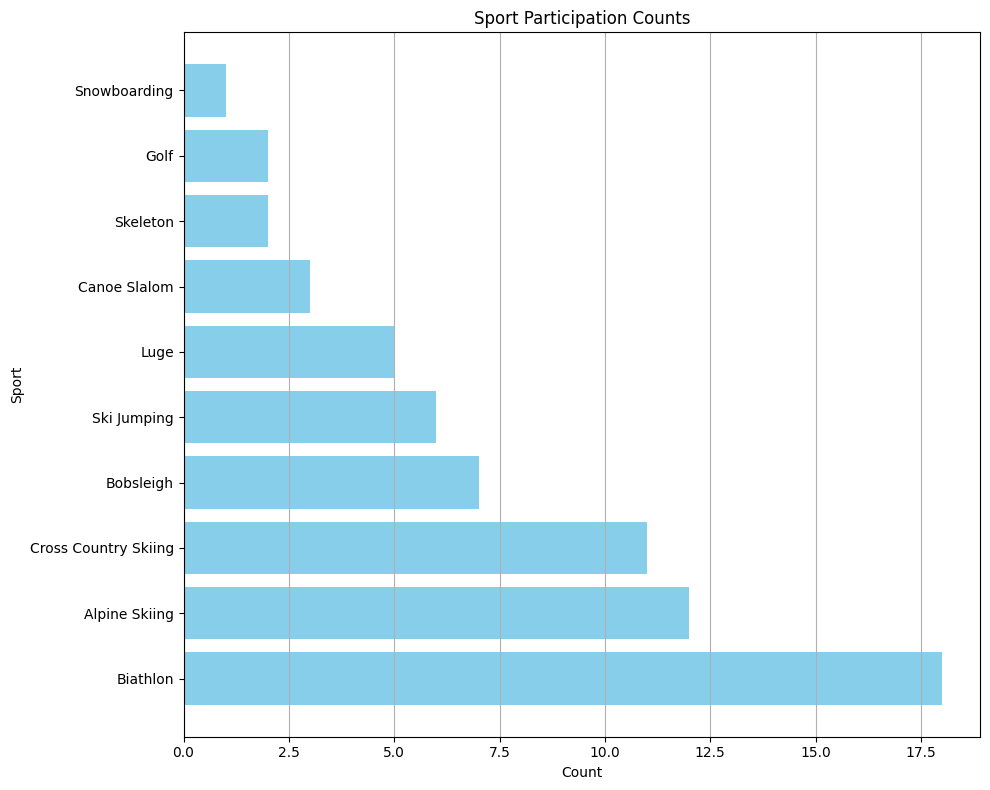

In [250]:
sport = rDf['sport'].value_counts()

plt.figure(figsize=(10, 8))
plt.barh(sport.index, sport.values, color='skyblue')
plt.xlabel('Count')
plt.ylabel('Sport')
plt.title('Sport Participation Counts')
plt.grid(axis='x')
plt.tight_layout()
plt.show()